# Install Libraries

In [13]:
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load Data, Text Preprocessing, LabelEncoding, Vectorization, 

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
#from sklearn.multiclass import OneHotEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
#%pip install nltk
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#Load data
data = pd.read_csv("cleaned_movies.csv")

# Preprocess text (replace with your cleaning steps)
data["SUMMARY"] = data["SUMMARY"].str.lower()
data["SUMMARY"] = data["SUMMARY"].str.replace("[^a-zA-Z0-9\s]", "")


def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))  # Load stopwords only once
  return ' '.join(word for word in text.split() if word not in stop_words)

data['SUMMARY']=data['SUMMARY'].apply(remove_stopwords)

data['SUMMARY']=data['SUMMARY'].apply(word_tokenize)

ps = PorterStemmer()
def stem_words(text):
  if isinstance(text, list):
    text = " ".join(text)
  return " ".join([ps.stem(word) for word in text.split()])

data['SUMMARY']=data['SUMMARY'].apply(stem_words)




In [15]:
pd.unique(data['GENRE'])

array([ 8, 24,  1,  7,  5,  6, 18, 13, 22,  3,  0, 10, 21, 20, 14,  2, 23,
       26,  9, 16, 12, 17,  4, 19, 11, 15, 25])

In [16]:
data["SUMMARY"]

0        [ 'listen ' , 'convers ' , 'doctor ' , 'parent...
1        [ 'brother ' , 'sister ' , 'past ' , 'incestu ...
2        [ 'bu ' , 'empti ' , 'student ' , 'field ' , '...
3        [ 'help ' , 'unemploy ' , 'father ' , 'make ' ...
4        [ 'film ' , 'titl ' , 'refer ' , 'unrecov ' , ...
                               ...                        
54209    [ 'shortliv ' , 'nbc ' , 'live ' , 'sitcom ' ,...
54210    [ 'next ' , 'gener ' , 'exploit ' , 'sister ' ...
54211    [ 'ze ' , 'bestaan ' , 'echt ' , 'standup ' , ...
54212    [ 'walter ' , 'vivian ' , 'live ' , 'countri '...
54213    [ 'labor ' , 'day ' , 'weekend ' , '1935 ' , '...
Name: SUMMARY, Length: 54214, dtype: object

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data["SUMMARY"], data["GENRE"], test_size=0.2)

# One-hot encode target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))


np.unique(y_train_encoded)

c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [18]:
'''scaler = MinMaxScaler()
y_train_encoded = scaler.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_encoded = scaler.fit_transform(y_test_encoded.reshape(-1, 1))
'''

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


print(X_train_features.shape)
print(y_train.shape)
y_train_encoded.shape

(43371, 5000)
(43371,)


(43371,)

# Multinomial Naive Bayes

In [19]:

#X_train_tfidf.shape
# Train model (SVM in this example)
model = MultinomialNB()
model.fit(X_train_features, y_train_encoded)

# Prediction on test set
y_pred = model.predict(X_test_features)

# Decode predictions and evaluate performance (replace with desired metrics)
y_pred_decoded = encoder.inverse_transform(y_pred)
accuracy = (y_pred_decoded == y_test.values).mean()
print("Accuracy:", accuracy)


Accuracy: 0.5133265701374159


# Logigstic Regression

In [20]:
# Train model (SVM in this example)
model = LogisticRegression(solver='lbfgs',multi_class='ovr')
model.fit(X_train_features, y_train_encoded)

# Prediction on test set
y_pred = model.predict(X_test_features)

# Decode predictions and evaluate performance (replace with desired metrics)
y_pred_decoded = encoder.inverse_transform(y_pred)
accuracy = (y_pred_decoded == y_test.values).mean()
print("Accuracy:", accuracy)

c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5781610255464354


# XGboost Classifier 

In [21]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import xgboost as xgb

In [23]:
model = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=25, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['mlogloss'], 
                            seed=42)
#model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,max_depth=10, random_state=20)
model.fit(X_train_features, y_train_encoded,verbose=1,eval_set=[(X_train_features, y_train_encoded), (X_test_features, y_test_encoded)])

# Prediction on test set
y_pred = model.predict(X_test_features)

# Decode predictions and evaluate performance (replace with desired metrics)
y_pred_decoded = encoder.inverse_transform(y_pred) 
accuracy = (y_pred_decoded == y_test.values).mean()
print("Accuracy:", accuracy)

[0]	validation_0-mlogloss:2.41564	validation_1-mlogloss:2.48619
[1]	validation_0-mlogloss:2.17804	validation_1-mlogloss:2.28430
[2]	validation_0-mlogloss:2.01938	validation_1-mlogloss:2.15210
[3]	validation_0-mlogloss:1.89882	validation_1-mlogloss:2.05766
[4]	validation_0-mlogloss:1.80363	validation_1-mlogloss:1.98640
[5]	validation_0-mlogloss:1.72842	validation_1-mlogloss:1.93217
[6]	validation_0-mlogloss:1.66408	validation_1-mlogloss:1.88792
[7]	validation_0-mlogloss:1.61063	validation_1-mlogloss:1.85210
[8]	validation_0-mlogloss:1.56431	validation_1-mlogloss:1.82224
[9]	validation_0-mlogloss:1.52308	validation_1-mlogloss:1.79761
[10]	validation_0-mlogloss:1.48750	validation_1-mlogloss:1.77780
[11]	validation_0-mlogloss:1.45465	validation_1-mlogloss:1.75857
[12]	validation_0-mlogloss:1.42446	validation_1-mlogloss:1.74389
[13]	validation_0-mlogloss:1.39743	validation_1-mlogloss:1.73005
[14]	validation_0-mlogloss:1.37196	validation_1-mlogloss:1.71805
[15]	validation_0-mlogloss:1.34887	

# LGBM Classifier

In [31]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_jobs = -1,n_estimators = 150,learning_rate = 0.1,boosting_type = 'dart',max_depth = -1,objective = 'multiclass', bagging_fraction=0.8,bagging_freq=10)


lgbm.fit(X_train_features,y_train_encoded)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412309
[LightGBM] [Info] Number of data points in the train set: 43371, number of used features: 4998
[LightGBM] [Info] Start training from score -3.706816
[LightGBM] [Info] Start training from score -4.544148
[LightGBM] [Info] Start training from score -4.254299
[LightGBM] [Info] Start tra

LGBMClassifier(bagging_fraction=0.8, bagging_freq=10, boosting_type='dart',
               n_estimators=150, n_jobs=-1, objective='multiclass')

In [32]:
y_pred_lgbm = lgbm.predict(X_test_features)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [33]:
y_pred_decoded = encoder.inverse_transform(y_pred)

In [42]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_pred_decoded,y_test)
accuracy

0.5444987549571152

# VotingClassifier

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression(multi_class='ovr')),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(decision_function_shape='ovo')),
        ('lgbm',LGBMClassifier())
    ],
    voting='hard'  # or 'soft' for averaging predicted probabilities
)


In [36]:
voting_clf.fit(X_train_features,y_train_encoded)


c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.237598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412309
[LightGBM] [Info] Number of data points in the train set: 43371, number of used features: 4998
[LightGBM] [Info] Start training from score -3.706816
[LightGBM] [Info] Start training from score -4.544148
[LightGBM] [Info] Start training from score -4.254299
[LightGBM] [Info] Start training from score -4.676131
[LightGBM] [Info] Start training from score -5.340008
[LightGBM] [Info] Start training from score -1.978032
[LightGBM] [Info] Start training from score -4.666279
[LightGBM] [Info] Start training from score -1.421946
[LightGBM] [Info] Start training from score -1.377548
[LightGBM] [Info] Start training from score -4.222348
[LightGBM] [Info] Start training from score -5.132369
[LightGBM] [Info] Start training from score -5.63

VotingClassifier(estimators=[('logreg', LogisticRegression(multi_class='ovr')),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(decision_function_shape='ovo')),
                             ('lgbm', LGBMClassifier())])

In [37]:
y_pred_voting = voting_clf.predict(X_test_features)

In [38]:
y_pred_decoded_voting = encoder.inverse_transform(y_pred)
accuracy = (y_pred_decoded_voting == y_test_encoded).mean()
print("Accuracy:", accuracy)

Accuracy: 0.5444987549571152


In [39]:
from   sklearn.metrics import classification_report,confusion_matrix

In [40]:
etc_classification_report = classification_report(y_pred_voting,y_test_encoded)
print(etc_classification_report)
etc_confusion_matrix = confusion_matrix(y_pred_voting,y_test_encoded)


              precision    recall  f1-score   support

           0       0.23      0.46      0.31       125
           1       0.28      0.82      0.42        44
           2       0.16      0.60      0.26        43
           3       0.12      0.65      0.20        17
           4       0.00      0.00      0.00         0
           5       0.61      0.52      0.56      1684
           6       0.02      0.29      0.04         7
           7       0.88      0.63      0.73      3696
           8       0.78      0.52      0.62      4023
           9       0.05      0.57      0.10        14
          10       0.00      0.00      0.00         2
          11       0.62      0.96      0.75        25
          12       0.00      0.00      0.00         0
          13       0.51      0.73      0.60       310
          14       0.29      0.70      0.41        69
          15       0.00      0.00      0.00         0
          16       0.02      0.50      0.03         2
          17       0.00    

c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\This PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

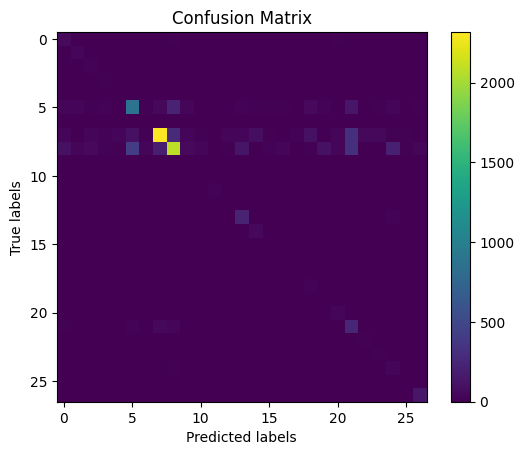

<Figure size 6000x4000 with 0 Axes>

In [44]:

from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay







plt.imshow(etc_confusion_matrix, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.figure(figsize=(60,40))
plt.show()